In [1]:
import datetime
from matplotlib import pyplot as plt
import os

import cv2
import librosa

In [2]:
season_max = 27

In [3]:
DATA_PATH = os.path.join('.', 'data')
VIDEO_PATH = os.path.join(DATA_PATH, 'video')
AUDIO_PATH = os.path.join(DATA_PATH, 'audio')
SUB_V1_PATH = os.path.join(DATA_PATH, 'sub_v1')
SUB_V2_PATH = os.path.join(DATA_PATH, 'sub_v2')

In [4]:
def create_spectrogram(path_to_vid: str, path_to_save: str) -> bool:
    '''
    Создание спектрограммы из звуковой дорожки видеофайла.
    args
        path_to_vid: str - путь к видеофайлу
        path_to_saveL str - путь для сохранения спектрограммы
    return
        bool - результат преобразования и сохранения
    '''
    return False


def determine_by_video(fd, time_start, time_end) -> str:
    '''
    Определение говорящего во видеоряду
    args
        fd: _io.TextIOWrapper - файловый дескриптор видеофайла
        time_start - начало временного отрезка сутбитра
        time_end - окончание временного отрезка сутбитра
    return
        str - имя говорящего / unknown
    '''
    return 'unk'


def determine_by_audio(fd, time_start, time_end) -> str:
    '''
    Определение говорящего во звуку
    args
        fd: _io.TextIOWrapper - файловый дескриптор аудиофайла
        time_start - начало временного отрезка сутбитра
        time_end - окончание временного отрезка сутбитра
    return
        str - имя говорящего / unknown
    '''
    return 'unk'


In [5]:
for season in range(1, season_max + 1):
    cur_vid_path = os.path.join(VIDEO_PATH, f'season{season:02}')
    cur_sub_path = os.path.join(SUB_V1_PATH, f'season{season:02}')
    cur_spec_path = os.path.join(AUDIO_PATH, f'season{season:02}')
    vidnames = os.listdir(cur_vid_path)
    subttls = os.listdir(cur_sub_path)

    if len(vidnames) != len(subttls):
        print(f'missed data at season {season}')

    for idx in range(len(vidnames)):
        vid_fname = vidnames[idx]
        spectre_fname = '.'.join(vid_fname.split('.')[:-1]) + '.png'
        check_path = os.path.join(os.path.join(cur_spec_path,
                                               spectre_fname
                                              ))

        if not os.path.exists(check_path):
            # create and save spectre
            print(f'Absent spectrogram for {check_path}')
            print('Creating...')
            tmp_vid_path = os.path.join(cur_vid_path, vid_fname)
            tmp_spec_path = os.path.join(cur_spec_path, spectre_fname)
            #print(tmp_vid_path)
            #print(tmp_spec_path)
            
            state = create_spectrogram(tmp_vid_path, tmp_spec_path)
            if not state:
                print('Error to create spectrogram. Exiting')
                break
            print('Done')
        break

    break

Absent spectrogram for .\data\audio\season01\S01E01.Simpsons_Roasting_on_an_Open_Fire.png
Creating...
Error to create spectrogram. Exiting


In [13]:
for name in [subttls[0]]:
    with open(os.path.join(SUB_V1_PATH, f'season{season:02}', name)) as fd:
        #data = read(fd)
        data = fd.read()
        data = data.split('\n')
        print(type(fd))

new_subtitle = []
for idx, el in enumerate(data):
    if el.startswith('00:') or el.startswith('01:'):
        new_subtitle.append(idx)

In [42]:
diff = []
for idx in new_subtitle:
    start, end = data[idx].split(' --> ')
    #print()
    start = datetime.datetime.strptime(start, '%H:%M:%S,%f')
    end = datetime.datetime.strptime(end, '%H:%M:%S,%f')
    diff.append((end - start).total_seconds())

(array([ 26.,  52., 148.,  99.,  75.,  48.,  25.,   5.,   1.,   7.]),
 array([1.04 , 1.428, 1.816, 2.204, 2.592, 2.98 , 3.368, 3.756, 4.144,
        4.532, 4.92 ]),
 <BarContainer object of 10 artists>)

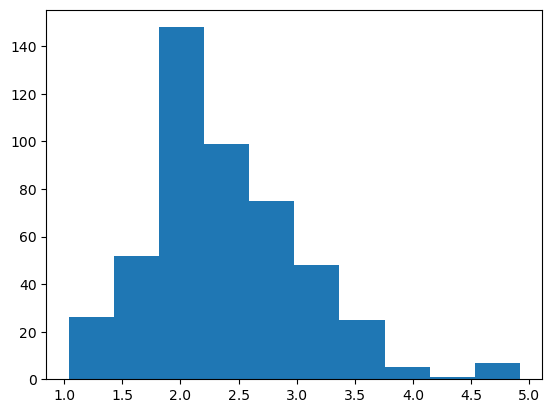

In [54]:
plt.hist(diff)